In [9]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('/Users/maxwellpatterson/Desktop/personal/bball/ass-content/data/modern_RAPTOR_by_player.csv')

In [5]:
data.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,...,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,Precious Achiuwa,achiupr01,2022,3802,1892,-2.521510,1.763502,-0.758008,-1.687893,3.103441,...,-2.517372,2.144151,-0.373221,2.262658,2.309611,-0.046953,-2.483956,2.024360,-0.459596,-0.728609


In [35]:
data.shape

(4684, 22)

In [7]:
data.columns

Index(['player_name', 'player_id', 'season', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')

/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureW

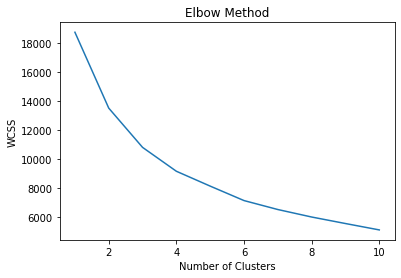

/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.324

Cluster 0:
raptor_box_offense    -5.566981
raptor_box_defense    17.914911
raptor_total          10.700475
war_total              0.087787
dtype: float64

Cluster 1:
raptor_box_offense    -4.946346
raptor_box_defense    -5.435250
raptor_total         -10.809652
war_total             -0.613670
dtype: float64

Cluster 2:
raptor_box_offense   -1.836842
raptor_box_defense   -0.773902
raptor_total         -2.720437
war_total             0.112732
dtype: float64

Cluster 3:
raptor_box_offense     4.039390
raptor_box_defense     1.147530
raptor_total           5.511421
war_total             10.743031
dtype: float64

Cluster 4:
raptor_box_offense    0.455915
raptor_box_defense    0.951637
raptor_total          1.516691
war_total             3.136795
dtype: float64

Cluster 5:
raptor_box_offense   -21.493719
raptor_box_defense   -16.014790
raptor_total         -42.467591
war_total             -0.130802
dtype: float64


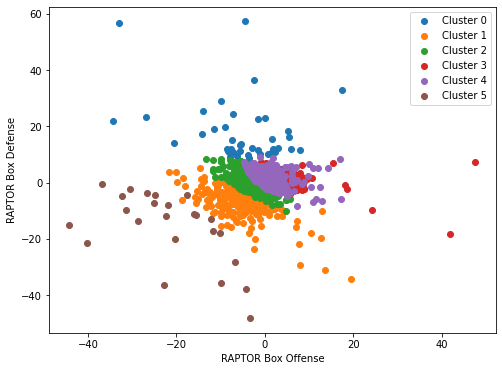

In [11]:
# Handle missing values
data = data.dropna()  # Remove rows with missing values

# Select relevant features for clustering
features = ['raptor_box_offense', 'raptor_box_defense', 'raptor_total', 'war_total']
X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters based on the elbow curve
k = 6  # Adjust this value based on your analysis

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels for each player
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Evaluate the clustering quality using silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Analyze the clusters
for i in range(k):
    cluster_data = data[data['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data[features].mean())

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['raptor_box_offense'], cluster_data['raptor_box_defense'], label=f'Cluster {i}')
plt.xlabel('RAPTOR Box Offense')
plt.ylabel('RAPTOR Box Defense')
plt.legend()
plt.show()

In [12]:
# Extract the unique years from the 'season' column
years = data['season'].unique()

print("Available Years:")
print(years)

Available Years:
[2017 2018 2019 2021 2022 2014 2015 2016 2020]


In [13]:
# Select relevant features for prediction
features = ['raptor_box_offense', 'raptor_box_defense', 'raptor_total', 'war_total']

# Create a new DataFrame with player ID, season, and selected features
player_data = data[['player_id', 'season'] + features]

# Pivot the DataFrame to have player IDs as rows and seasons as columns
player_data_pivoted = player_data.pivot(index='player_id', columns='season', values=features)

# Handle missing values (fill with 0 or use appropriate imputation technique)
player_data_pivoted.fillna(0, inplace=True)

In [30]:
# Get the list of feature columns for the previous seasons
previous_seasons = sorted(set(col[1] for col in player_data_pivoted.columns if col[1] != target_season))

target_season = max(years)

# Get the list of feature columns for the target season
target_features = [col for col in player_data_pivoted.columns if col[1] == target_season]

# Create empty lists to store the training and testing data
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []

# Iterate over the previous seasons
for season in previous_seasons:
    # Get the feature columns for the current season
    current_features = [col for col in player_data_pivoted.columns if col[1] == season]
    
    # Split the data into training and testing sets for the current season
    X_train_season = player_data_pivoted.loc[:, current_features]
    y_train_season = player_data_pivoted.loc[:, target_features]
    X_test_season = player_data_pivoted.loc[:, current_features]
    y_test_season = player_data_pivoted.loc[:, target_features]
    
    # Append the data for the current season to the respective lists
    X_train_list.append(X_train_season)
    y_train_list.append(y_train_season)
    X_test_list.append(X_test_season)
    y_test_list.append(y_test_season)

# Concatenate the data for all seasons
X_train = pd.concat(X_train_list, axis=1)
y_train = pd.concat(y_train_list, axis=1)
X_test = pd.concat(X_test_list, axis=1)
y_test = pd.concat(y_test_list, axis=1)

In [28]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1314, 32)
y_train shape: (1314, 32)
X_test shape: (1314, 32)
y_test shape: (1314, 32)


In [31]:
from sklearn.model_selection import train_test_split

# Get the list of feature columns for the previous seasons
previous_seasons = sorted(set(col[1] for col in player_data_pivoted.columns if col[1] != target_season))

# Get the list of feature columns for the target season
target_features = [col for col in player_data_pivoted.columns if col[1] == target_season]

# Create empty lists to store the feature and target data
X = []
y = []

# Iterate over the previous seasons
for season in previous_seasons:
    # Get the feature columns for the current season
    current_features = [col for col in player_data_pivoted.columns if col[1] == season]
    
    # Append the feature and target data for the current season to the respective lists
    X.append(player_data_pivoted.loc[:, current_features])
    y.append(player_data_pivoted.loc[:, target_features])

# Concatenate the feature and target data for all seasons
X = pd.concat(X, axis=1)
y = pd.concat(y, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(y_test)

Empty DataFrame
Columns: []
Index: [abrinal01, achiupr01, acyqu01, adamsja01, adamsjo01, adamsst01, adebaba01, adelde01, adrieje01, afflaar01, ajincal01, akoonde01, aldamsa01, aldemfu01, aldrico01, aldrila01, alexacl01, alexaky01, alexani01, alexaty01, alkinra01, allengr01, allenja01, allenka01, allenla01, allenra02, allento01, alvarjo01, aminual01, amundlo01, anderal01, anderch01, anderja01, anderju01, anderky01, anderry01, anigbik01, antetgi01, antetko01, antetth01, anthoca01, anthoco01, anthojo01, anticpe01, anunoog01, applike01, arcidry01, arizatr01, armsthi01, artesro01, arthuda01, artisja01, asikom01, augusdj01, avdijde01, ayayijo01, ayongu01, aytonde01, azubuud01, babbch01, babbilu01, bacondw01, baglema01, bairsca01, bakerro01, baldwwa01, ballla01, balllo01, bambamo01, banede01, bantoda01, barbeca01, barbole01, bareajo01, bargnan01, barneha02, barnema02, barnesc01, barrerj01, barroea01, bartowi01, bassbr01, bassech01, basspa01, bateske01, battish01, batumni01, bayleje01, baynear

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 16.606686823478093
R-squared (R2) Score: 0.15169686913759692


<ipython-input-36-cc59f5215390>:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.scatter(y_test[feature], y_pred_df[feature], alpha=0.5)


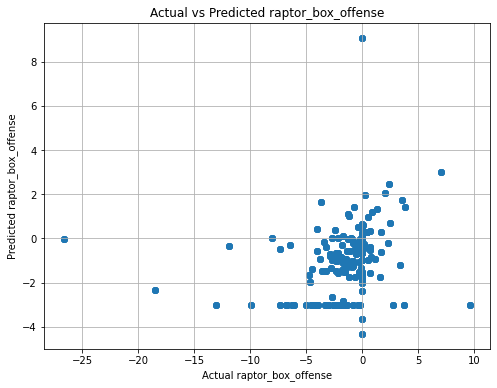

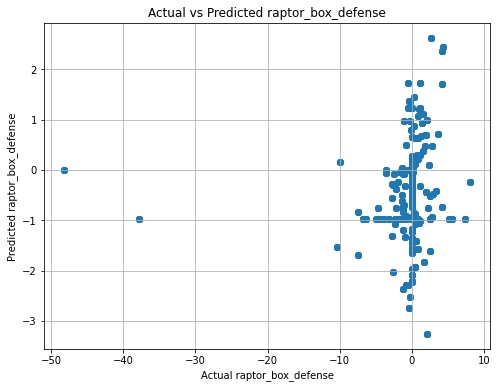

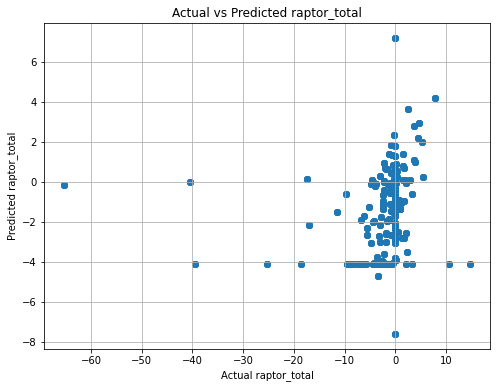

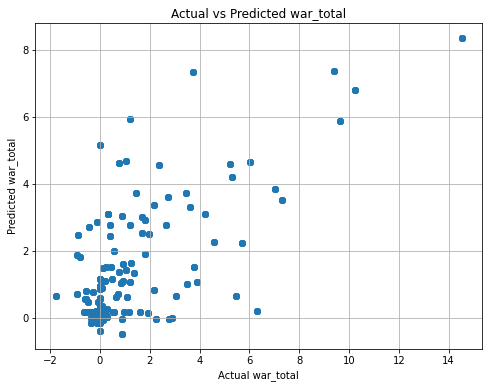

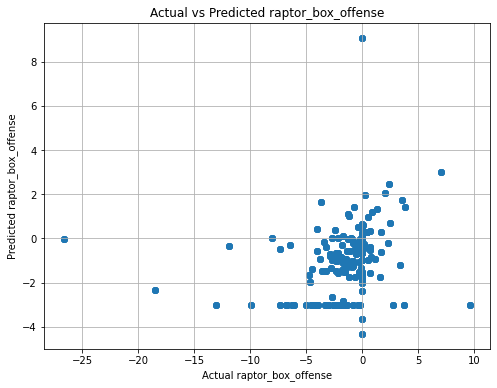

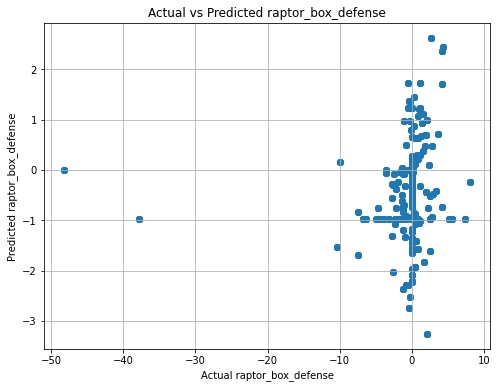

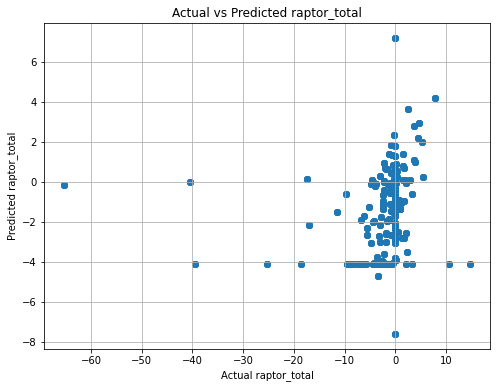

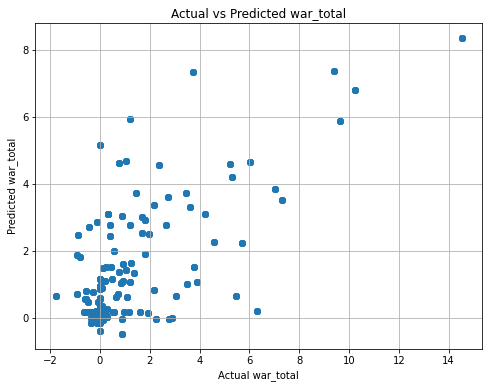

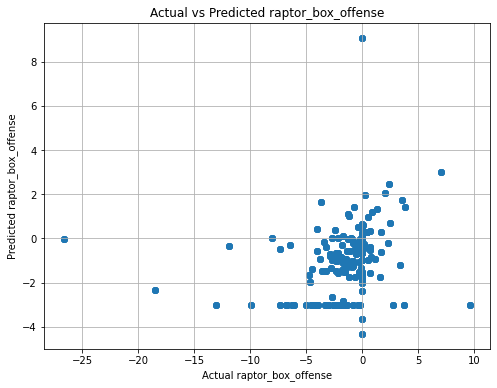

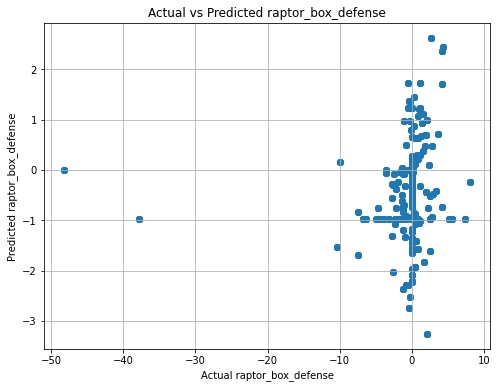

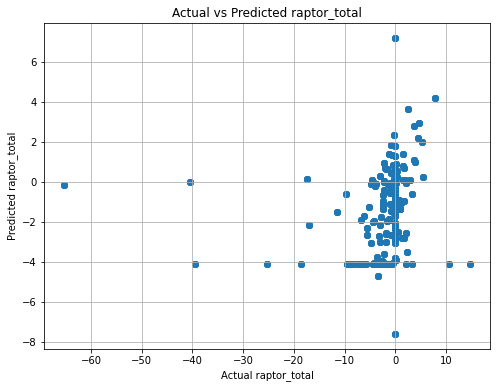

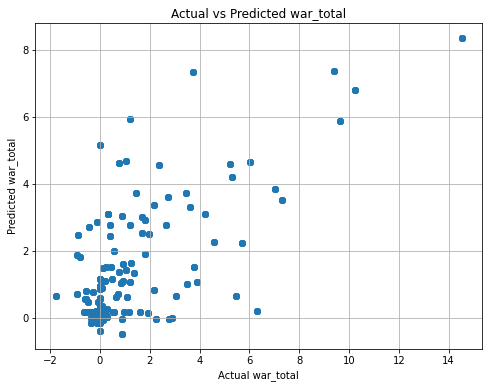

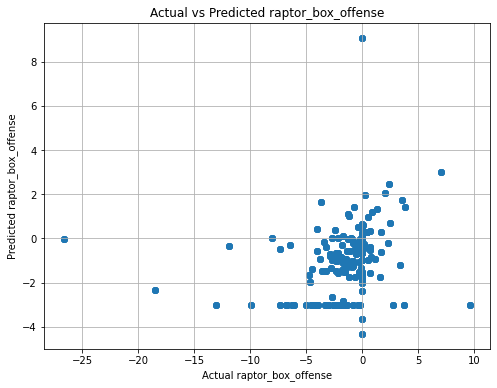

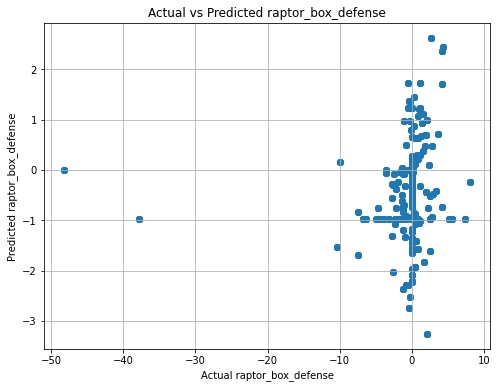

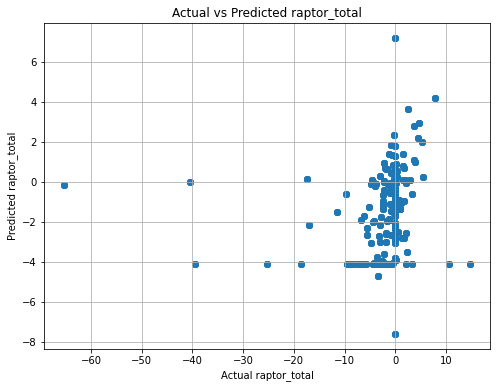

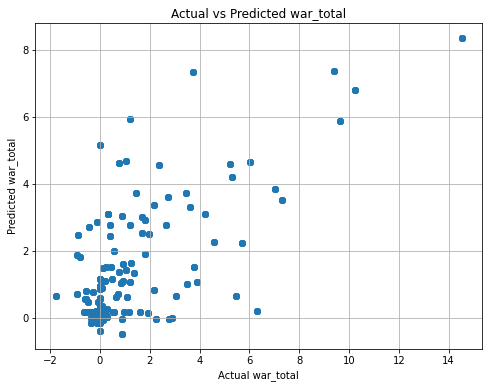

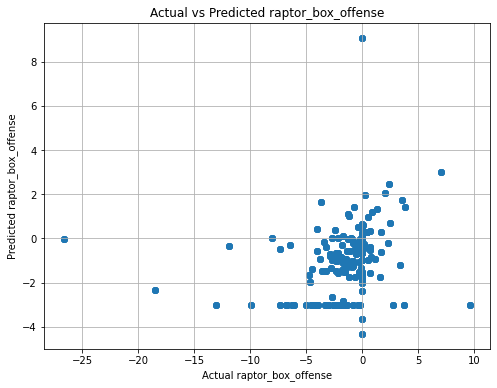

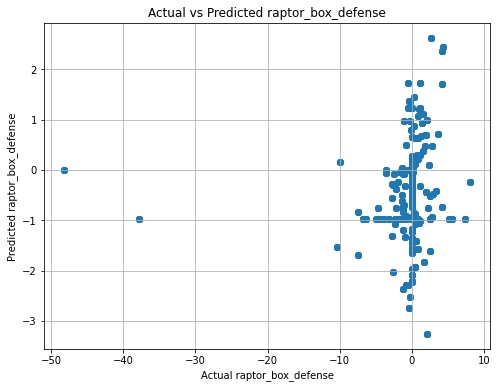

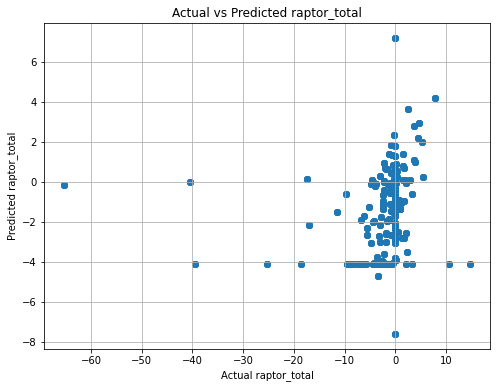

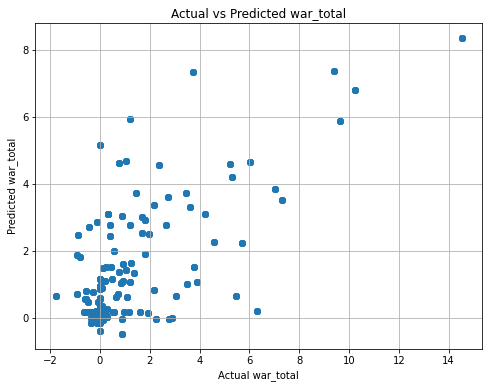

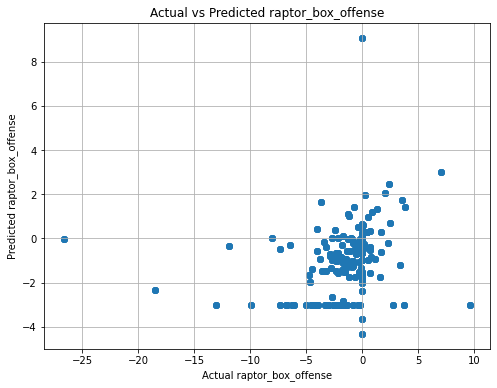

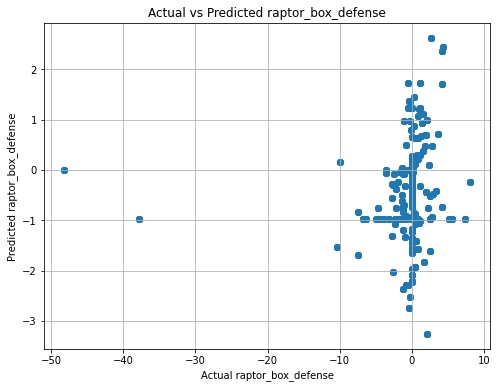

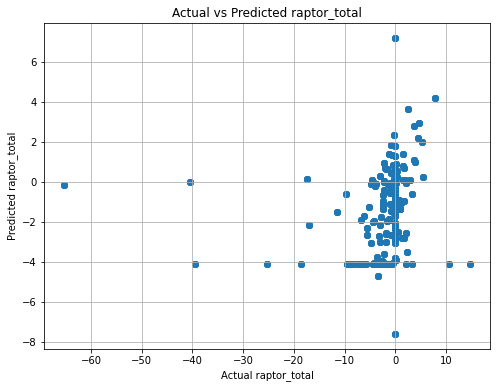

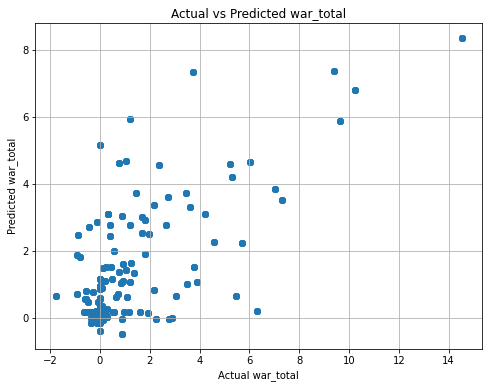

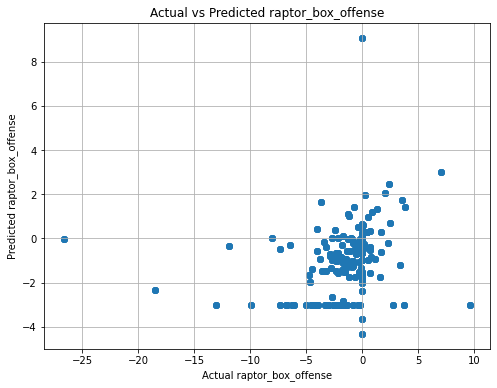

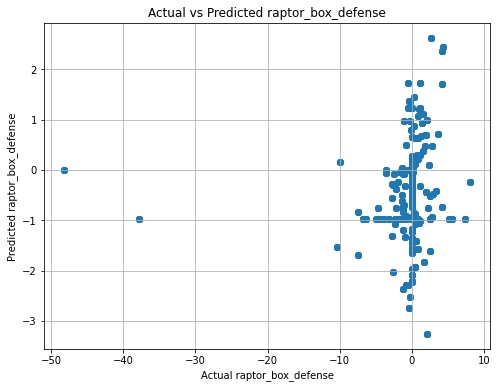

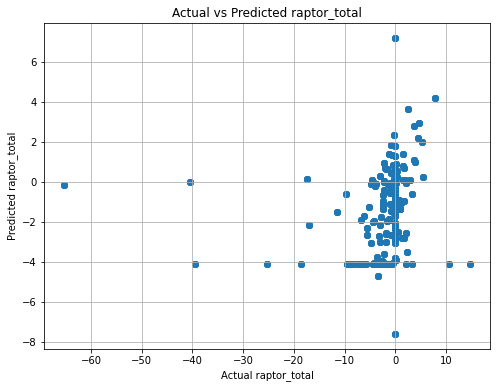

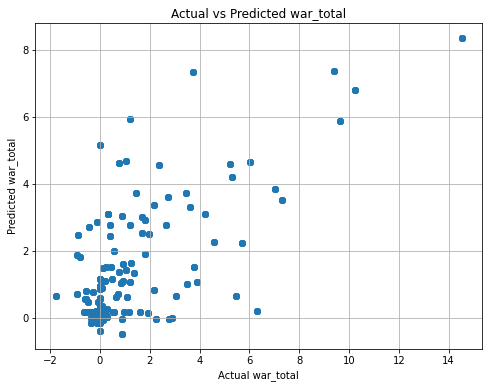

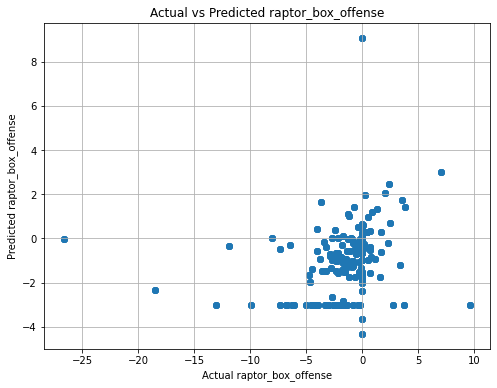

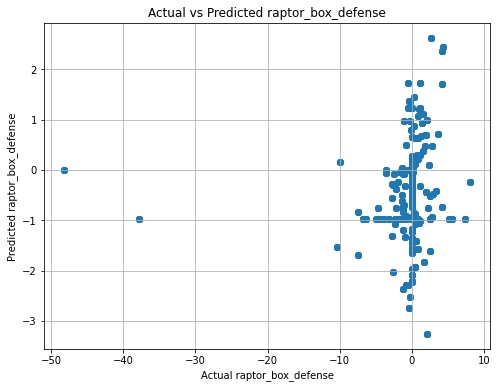

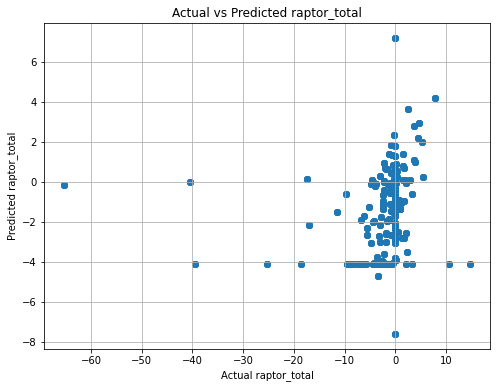

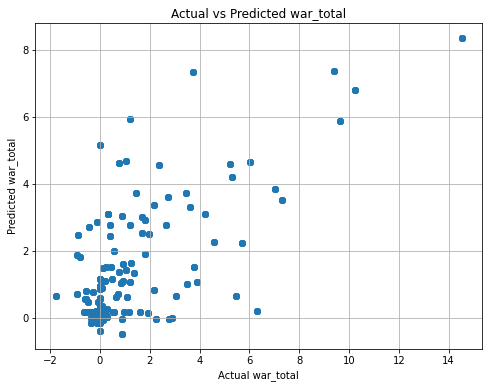

In [36]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and made predictions on the testing set

# Convert the predicted values to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns, index=y_test.index)

# Iterate over the target features and create a scatter plot for each feature
for feature in y_test.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[feature], y_pred_df[feature], alpha=0.5)
    plt.xlabel(f'Actual {feature[0]}')
    plt.ylabel(f'Predicted {feature[0]}')
    plt.title(f'Actual vs Predicted {feature[0]}')
    plt.grid(True)
    plt.show()

## Stats and Winning

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer

In [43]:
data.columns

Index(['player_name', 'player_id', 'season', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')

In [48]:
# Select relevant features for analysis
player_metrics = ['raptor_onoff_offense', 'raptor_onoff_defense']
performance_metric = 'raptor_total'  # Adjust based on the desired performance metric

# Prepare the features and target variable
X = data[player_metrics]
y = data[performance_metric]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform feature selection using F-test
k = 2  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X_scaled, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]

# Train a linear regression model
model = LinearRegression()
model.fit(X_imputed[:, selector.get_support()], y)

# Print the model coefficients and intercept
print("Model Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")

# Evaluate the model
score = model.score(X_imputed[:, selector.get_support()], y)
print(f"Model R-squared: {score}")

Model Coefficients:
raptor_onoff_offense: 0.532326306207875
raptor_onoff_defense: 0.447444064811497
Intercept: -0.8194432692497507
Model R-squared: 0.5516586806670337


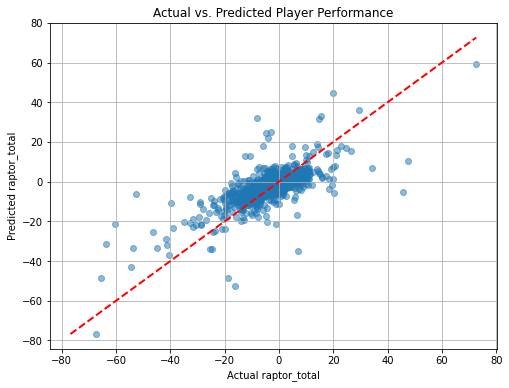

In [49]:
# Make predictions using the trained model
y_pred = model.predict(X_imputed[:, selector.get_support()])

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel('Actual raptor_total')
plt.ylabel('Predicted raptor_total')
plt.title('Actual vs. Predicted Player Performance')
plt.grid(True)

# Add a diagonal line representing perfect predictions
min_value = min(y.min(), y_pred.min())
max_value = max(y.max(), y_pred.max())
plt.plot([min_value, max_value], [min_value, max_value], 'r--', linewidth=2)

plt.show()